In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


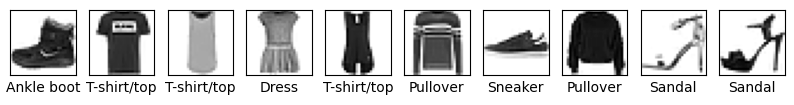

In [2]:
# 1. Завантажити датасет Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Імена класів
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 2. Роздрукувати 10 зображень
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



In [3]:
# 3. Підготовка даних (нормалізація)
train_images = train_images / 255.0
test_images = test_images / 255.0

# 4. Побудова архітектури моделі
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Розгортання зображень у вектор
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Вихідний шар для 10 класів
])


#model = tf.keras.Sequential()

#model.add(tf.keras.Input(shape=(28, 28)))
#model.add(layers.Flatten())
#model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dense(10, activation='softmax'))


# Компіляція моделі
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Виведення архітектури моделі
model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 5. Використання ранньої зупинки та зменшення швидкості навчання
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

# 6. Навчання моделі
history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, reduce_lr])

# # 7. Збереження моделі на Google Диск
# from google.colab import drive
# drive.mount('/content/drive')
# model.save('/content/drive/MyDrive/fashion_mnist_model.h5')



Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9351 - loss: 0.1659 - val_accuracy: 0.8973 - val_loss: 0.3238 - learning_rate: 8.0000e-06
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.9374 - loss: 0.1629 - val_accuracy: 0.8986 - val_loss: 0.3245 - learning_rate: 8.0000e-06
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9373 - loss: 0.1600 - val_accuracy: 0.8977 - val_loss: 0.3257 - learning_rate: 8.0000e-06
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9374 - loss: 0.1597 - val_accuracy: 0.8983 - val_loss: 0.3256 - learning_rate: 1.6000e-06


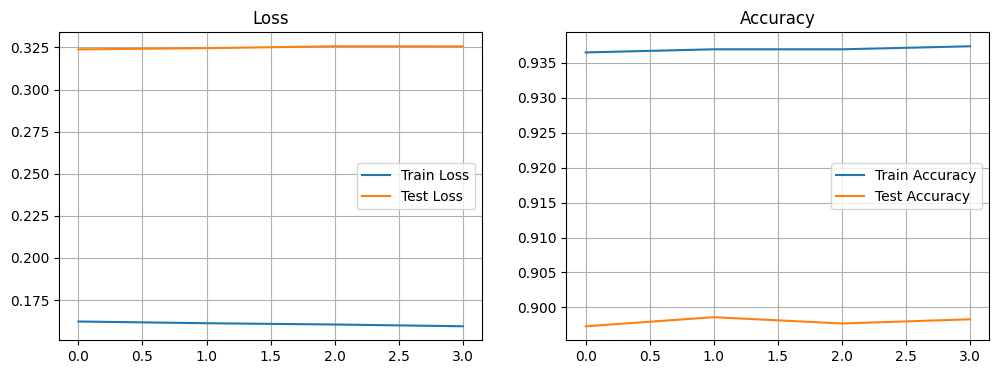

In [7]:
# 8. Побудова графіків функції втрат і точності
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

plt.show()



313/313 - 1s - 4ms/step - accuracy: 0.8973 - loss: 0.3238
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.82      0.82      0.82      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.81      0.82      0.82      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.74      0.71      0.72      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



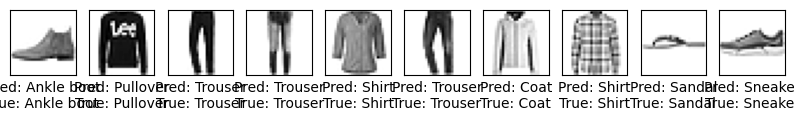

In [8]:
# 9. Виведення класифікаційного звіту
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
predictions = model.predict(test_images)

# Перетворюємо прогнози в мітки
predicted_labels = np.argmax(predictions, axis=1)

# Виведення класифікаційного звіту
print(classification_report(test_labels, predicted_labels, target_names=class_names))

# 10. Результати розпізнавання із прогнозованим і справжнім класом
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[test_labels[i]]}")
plt.show()